In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
print('all the modules are imported!!')

all the modules are imported!!


In [2]:
df=pd.read_csv('C:/Users/Dr697699/Downloads/train.csv',low_memory=False)
df.describe()

,ID,pickup+AF8-loc,drop+AF8-loc,distance,num+AF8-passengers,payment+AF8-method,rate+AF8-code
count,1.048575e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06
mean,5.242870e+05,1.648085e+02,1.626675e+02,2.859832e+00,1.590696e+00,1.317943e+00,1.043368e+00
std,3.026977e+05,6.579282e+01,6.953073e+01,3.709541e+00,1.253700e+00,4.853266e-01,5.621114e-01
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,2.621435e+05,1.250000e+02,1.130000e+02,9.300000e-01,1.000000e+00,1.000000e+00,1.000000e+00
50%,5.242870e+05,1.620000e+02,1.620000e+02,1.600000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,7.864305e+05,2.330000e+02,2.330000e+02,2.900000e+00,2.000000e+00,2.000000e+00,1.000000e+00
max,1.048574e+06,2.650000e+02,2.650000e+02,1.138000e+02,9.000000e+00,4.000000e+00,9.900000e+01


In [3]:
df.columns

Index(['ID', 'vendor+AF8-id', 'pickup+AF8-loc', 'drop+AF8-loc',
       'driver+AF8-tip', 'mta+AF8-tax', 'distance', 'pickup+AF8-time',
       'drop+AF8-time', 'num+AF8-passengers', 'toll+AF8-amount',
       'payment+AF8-method', 'rate+AF8-code', 'stored+AF8-flag',
       'extra+AF8-charges', 'improvement+AF8-charge', 'total+AF8-amount'],
      dtype='object')

In [4]:
f_1=['distance']

print(df[f_1].head(10))
print(df[f_1].dtypes)

df[f_1]=df[f_1].fillna(value=df[f_1].mean(),axis=0)
print(df[f_1].count())

len(df[f_1])==len(df)

   distance
0      0.70
1      4.64
2      1.29
3      2.74
4      0.45
5      0.40
6      1.72
7      8.80
8      1.20
9     17.00
distance    float64
dtype: object
distance    1048575
dtype: int64


True

In [5]:
df[f_1].count()

distance    1048575
dtype: int64

In [6]:
f_1a=np.array(df[f_1])
for i in range(len(f_1a)):
    f_1a[i]=float(f_1a[i])
print(type(f_1a[25][0]))

df[f_1]=pd.DataFrame(f_1a)

print(type(df[f_1]))
print(df[f_1].head(10))

<class 'numpy.float64'>
<class 'pandas.core.frame.DataFrame'>
   distance
0      0.70
1      4.64
2      1.29
3      2.74
4      0.45
5      0.40
6      1.72
7      8.80
8      1.20
9     17.00


In [7]:
df.columns

Index(['ID', 'vendor+AF8-id', 'pickup+AF8-loc', 'drop+AF8-loc',
       'driver+AF8-tip', 'mta+AF8-tax', 'distance', 'pickup+AF8-time',
       'drop+AF8-time', 'num+AF8-passengers', 'toll+AF8-amount',
       'payment+AF8-method', 'rate+AF8-code', 'stored+AF8-flag',
       'extra+AF8-charges', 'improvement+AF8-charge', 'total+AF8-amount'],
      dtype='object')

In [8]:
f_2=['num+AF8-passengers']
print(df[f_2].dtypes)
df[f_2].describe()

num+AF8-passengers    float64
dtype: object


,num+AF8-passengers
count,1.048574e+06
mean,1.590696e+00
std,1.253700e+00
min,0.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,2.000000e+00
max,9.000000e+00


In [9]:
df[f_2]=df[f_2].fillna(value=df[f_2].mean(),axis=0)
df[f_2].describe()

,num+AF8-passengers
count,1.048575e+06
mean,1.590696e+00
std,1.253700e+00
min,0.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,2.000000e+00
max,9.000000e+00


In [10]:
df[f_2].count()

num+AF8-passengers    1048575
dtype: int64

In [11]:
df.columns

Index(['ID', 'vendor+AF8-id', 'pickup+AF8-loc', 'drop+AF8-loc',
       'driver+AF8-tip', 'mta+AF8-tax', 'distance', 'pickup+AF8-time',
       'drop+AF8-time', 'num+AF8-passengers', 'toll+AF8-amount',
       'payment+AF8-method', 'rate+AF8-code', 'stored+AF8-flag',
       'extra+AF8-charges', 'improvement+AF8-charge', 'total+AF8-amount'],
      dtype='object')

In [12]:
f_3=['extra+AF8-charges']
print(df[f_3].dtypes)

extra+AF8-charges    object
dtype: object


In [13]:
f_3a=np.array(df[f_3])
for i in range(len(f_3a)):
    if(f_3a[i]=='+AC0-0.5' or f_3a[i]=='+AC0-1' or f_3a[i]=='+AC0-4.5'):
        f_3a[i]='0'
    else:
        f_3a[i]=float(f_3a[i])

In [14]:
print(f_3a[0:5])

[[1.0]
 [1.0]
 [0.0]
 [0.0]
 [0.0]]


In [15]:
f_3a=list(f_3a)
for i in range(len(f_3a)):
    f_3a[i]=float(f_3a[i])

In [16]:
print(f_3a[1:10])

[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 4.5]


In [17]:
df[f_3]=pd.DataFrame(f_3a,index=df.ID)

In [18]:
df[f_3].dtypes

extra+AF8-charges    float64
dtype: object

In [19]:
print(df[f_3].head())
print(df[f_3].count())
df[f_3]=df[f_3].fillna(value=df[f_3].mean(),axis=0)

   extra+AF8-charges
0                1.0
1                1.0
2                0.0
3                0.0
4                0.0
extra+AF8-charges    1048574
dtype: int64


In [20]:
df[f_3].count()

extra+AF8-charges    1048575
dtype: int64

In [21]:
df[f_3].describe()

,extra+AF8-charges
count,1.048575e+06
mean,3.413492e-01
std,4.836578e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,5.000000e-01
max,6.500000e+00


In [22]:
df[f_3]=df[f_3].fillna(value=df[f_3].mean(),axis=0)

In [23]:
df[f_3].describe()

,extra+AF8-charges
count,1.048575e+06
mean,3.413492e-01
std,4.836578e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,5.000000e-01
max,6.500000e+00


In [24]:
f_4=['toll+AF8-amount']
df[f_4].describe()

,toll+AF8-amount
count,1048573
unique,418
top,0
freq,991571


In [25]:
f_4a=np.array(df[f_4])
for i in range(len(f_4a)):
    if(f_4a[i][0]=='+AC0-5.76'):
        f_4a[i][0]='0'
    else:
        continue

In [26]:
f_4a=list(f_4a)
for i in range(len(f_4a)):
    f_4a[i]=float(f_4a[i])
print(f_4a[0:10])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.76]


In [27]:
df[f_4]=pd.DataFrame(f_4a,index=df.ID)

In [28]:
print(df[f_4].iloc[0:15])

    toll+AF8-amount
0              0.00
1              0.00
2              0.00
3              0.00
4              0.00
5              0.00
6              0.00
7              0.00
8              0.00
9              5.76
10             0.00
11             0.00
12             0.00
13             0.00
14             0.00


In [29]:
df[f_4].describe()

,toll+AF8-amount
count,1.048573e+06
mean,3.458420e-01
std,2.138408e+00
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,9.057600e+02


In [30]:
print(df[f_4].dtypes)

mean=df[f_4].mean()
df[f_4]=df[f_4].fillna(value=mean,axis=0)

df[f_4].describe()

toll+AF8-amount    float64
dtype: object


,toll+AF8-amount
count,1.048575e+06
mean,3.458420e-01
std,2.138406e+00
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,9.057600e+02


In [31]:
df[f_4].describe()

,toll+AF8-amount
count,1.048575e+06
mean,3.458420e-01
std,2.138406e+00
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,9.057600e+02


In [32]:
df[f_4].count()

toll+AF8-amount    1048575
dtype: int64

In [33]:
df.columns

Index(['ID', 'vendor+AF8-id', 'pickup+AF8-loc', 'drop+AF8-loc',
       'driver+AF8-tip', 'mta+AF8-tax', 'distance', 'pickup+AF8-time',
       'drop+AF8-time', 'num+AF8-passengers', 'toll+AF8-amount',
       'payment+AF8-method', 'rate+AF8-code', 'stored+AF8-flag',
       'extra+AF8-charges', 'improvement+AF8-charge', 'total+AF8-amount'],
      dtype='object')

In [46]:
label='total+AF8-amount'
y_a=df[label]

In [47]:
y_a.describe()

count     1048573
unique       6106
top           7.8
freq        24068
Name: total+AF8-amount, dtype: object

In [48]:
y_a=y_a.fillna(value='0',axis=0)

In [50]:
y_ar=np.array(y_a)

In [53]:
for i in range(len(y_ar)):
    if(y_ar[i]=='+AC0-5.3' or y_ar[i]=='+AC0-7.8' or y_ar[i]=='+AC0-6.8' or y_ar[i]=='+AC0-6.3' or y_ar[i]=='+AC0-3.8' or y_ar[i]=='+AC0-4.3'):
        y_ar[i]='0'
    elif(y_ar[i]=='+AC0-4.94' or y_ar[i]=='+AC0-4.94' or y_ar[i]=='+AC0-4.8' or y_ar[i]=='+AC0-5.8' or y_ar[i]=='+AC0-7.75'):
        y_ar[i]='0'
    elif(y_ar[i]=='+AC0-3.3' or y_ar[i]=='+AC0-7.3' or y_ar[i]=='+AC0-52.8' or y_ar[i]=='+AC0-20.3' or y_ar[i]=='+AC0-3.96'):
        y_ar[i]='0'
    elif(y_ar[i]=='+AC0-9.3' or y_ar[i]=='+AC0-25.6' or y_ar[i]=='+AC0-14.56' or y_ar[i]=='+AC0-15.89' or y_ar[i]=='+AC0-57.3'):
        y_ar[i]='0'
    elif(y_ar[i]=='+AC0-8.8' or y_ar[i]=='+AC0-8.3' or y_ar[i]=='+AC0-20.8' or y_ar[i]=='+AC0-15.8' or y_ar[i]=='+AC0-10.8'):
        y_ar[i]='0'
    elif(y_ar[i]=='+AC0-5.59' or y_ar[i]=='+AC0-75.3' or y_ar[i]=='+AC0-55.8' or y_ar[i]=='+AC0-21.3' or y_ar[i]=='+AC0-65.3'):
        y_ar[i]='0'
    elif(y_ar[i]=='+AC0-14.8' or y_ar[i]=='+AC0-13.3' or y_ar[i]=='+AC0-9.6' or y_ar[i]=='+AC0-9.6' or y_ar[i]=='+AC0-260.8'):
        y_ar[i]='0'
    elif(y_ar[i]=='+AC0-58.56' or y_ar[i]=='+AC0-60.3' or y_ar[i]=='+AC0-35.8' or y_ar[i]=='+AC0-30.8' or y_ar[i]=='+AC0-17.8'):
        y_ar[i]='0'
    elif(y_ar[i]=='+AC0-30.86' or y_ar[i]=='+AC0-13.8' or y_ar[i]=='+AC0-5.16' or y_ar[i]=='+AC0-62.67' or y_ar[i]=='+AC0-0.85'):
        y_ar[i]='0'
    elif(y_ar[i]=='+AC0-105.8' or y_ar[i]=='+AC0-16.3'):
        y_ar[i]='0'
    else:
        continue


In [60]:
type(y_ar[25])
for i in range(len(y_ar)):
    y_ar[i]=float(y_ar[i])

In [61]:
df['total+AF8-amount']=pd.DataFrame(y_ar,index=df.ID)

In [65]:
print(df['total+AF8-amount'].describe())
df['total+AF8-amount'].iloc[1657]

count     1048575.0
unique       6060.0
top             7.8
freq        24068.0
Name: total+AF8-amount, dtype: float64


0.0

In [66]:
#now we are done with cleaning the data.
#let's visualize the data.

In [67]:
df.columns

Index(['ID', 'vendor+AF8-id', 'pickup+AF8-loc', 'drop+AF8-loc',
       'driver+AF8-tip', 'mta+AF8-tax', 'distance', 'pickup+AF8-time',
       'drop+AF8-time', 'num+AF8-passengers', 'toll+AF8-amount',
       'payment+AF8-method', 'rate+AF8-code', 'stored+AF8-flag',
       'extra+AF8-charges', 'improvement+AF8-charge', 'total+AF8-amount'],
      dtype='object')

In [68]:
features=['num+AF8-passengers','toll+AF8-amount','distance','extra+AF8-charges']
print(df[features].describe())
X_final=df[features]
y_final=df['total+AF8-amount']

       num+AF8-passengers  toll+AF8-amount      distance  extra+AF8-charges
count        1.048575e+06     1.048575e+06  1.048575e+06       1.048575e+06
mean         1.590696e+00     3.458420e-01  2.859832e+00       3.413492e-01
std          1.253700e+00     2.138406e+00  3.709539e+00       4.836578e-01
min          0.000000e+00     0.000000e+00  0.000000e+00       0.000000e+00
25%          1.000000e+00     0.000000e+00  9.300000e-01       0.000000e+00
50%          1.000000e+00     0.000000e+00  1.600000e+00       0.000000e+00
75%          2.000000e+00     0.000000e+00  2.900000e+00       5.000000e-01
max          9.000000e+00     9.057600e+02  1.138000e+02       6.500000e+00


In [69]:
y_final.describe()

count     1048575.0
unique       6060.0
top             7.8
freq        24068.0
Name: total+AF8-amount, dtype: float64

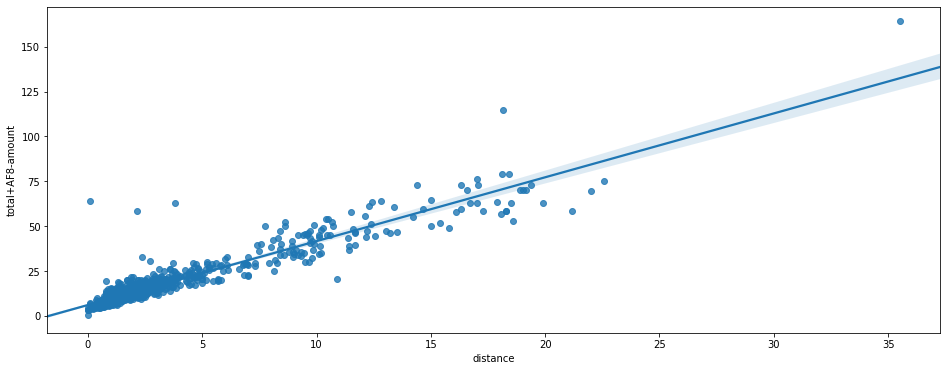

In [151]:
plt.figure(figsize=(16,6))
sns.regplot(x=X_final['distance'].iloc[0:1000],y=y_final.iloc[0:1000])

# clearly,we can see that,with increase in distance,the amount charged increases. hence,it(distance) can be taken as the major parameter for our model.

<Figure size 1152x720 with 0 Axes>

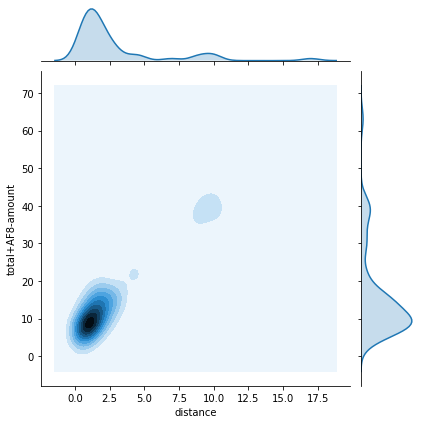

In [71]:
plt.figure(figsize=(16,10))
sns.jointplot(x=X_final['distance'].iloc[0:50],y=y_final.iloc[0:50],kind='kde')

# looking at the probability curve(kde->kernel density index),it can be said that,max. frequency of the travel takes in the distance range=(0.1-4.5)kms;
# and the amount paid ranges b/w~Rs.(0-50)/-

In [72]:
print(X_final['num+AF8-passengers'].dtypes)

float64


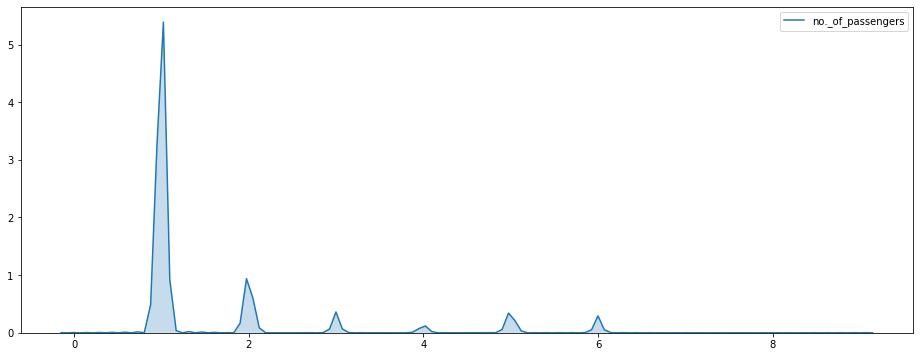

In [73]:
plt.figure(figsize=(16,6))
sns.kdeplot(data=X_final['num+AF8-passengers'],label='no._of_passengers',shade=True)

# It can be observed from the above graph that, max. occupancy in most of the rides remains b/w 1-2. 

<Figure size 1152x720 with 0 Axes>

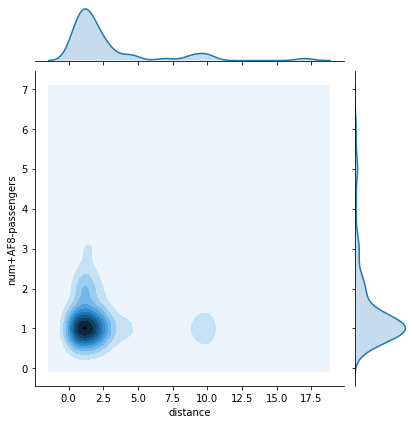

In [74]:
plt.figure(figsize=(16,10))
sns.jointplot(x=X_final['distance'].iloc[0:50],y=X_final['num+AF8-passengers'].iloc[0:50],kind='kde')

# mostly the journey ranges b/w ~ (0.1-5.0)kms and the no. of passengers travelling varies b/w ~ (1-3).

In [75]:
df.columns

Index(['ID', 'vendor+AF8-id', 'pickup+AF8-loc', 'drop+AF8-loc',
       'driver+AF8-tip', 'mta+AF8-tax', 'distance', 'pickup+AF8-time',
       'drop+AF8-time', 'num+AF8-passengers', 'toll+AF8-amount',
       'payment+AF8-method', 'rate+AF8-code', 'stored+AF8-flag',
       'extra+AF8-charges', 'improvement+AF8-charge', 'total+AF8-amount'],
      dtype='object')

In [76]:
a_fa=np.array(df['vendor+AF8-id'])

In [77]:
print(a_fa[0:10])

['1' '2' '2' '2' '2' '1' '2' '1' '1' '1']


In [78]:
for i in range(len(a_fa)):
    if(a_fa[i]=='+ACI-  +ACIAIg-status+ACIAIg- : 500+ACI-'):
        a_fa[i]='0'
    else:
        continue

In [79]:
for i in range(len(a_fa)):
    a_fa[i]=float(a_fa[i])

In [80]:
print(a_fa[0:10])

[1.0 2.0 2.0 2.0 2.0 1.0 2.0 1.0 1.0 1.0]


In [81]:
len(a_fa)

1048575

In [82]:
df['vendor+AF8-id']=pd.DataFrame(a_fa,index=df.ID)

In [83]:
print(type(df['vendor+AF8-id'].iloc[21]))
df['vendor+AF8-id']=df['vendor+AF8-id'].astype('float')

<class 'float'>


In [84]:
print(df['vendor+AF8-id'].iloc[0:10])

0    1.0
1    2.0
2    2.0
3    2.0
4    2.0
5    1.0
6    2.0
7    1.0
8    1.0
9    1.0
Name: vendor+AF8-id, dtype: float64


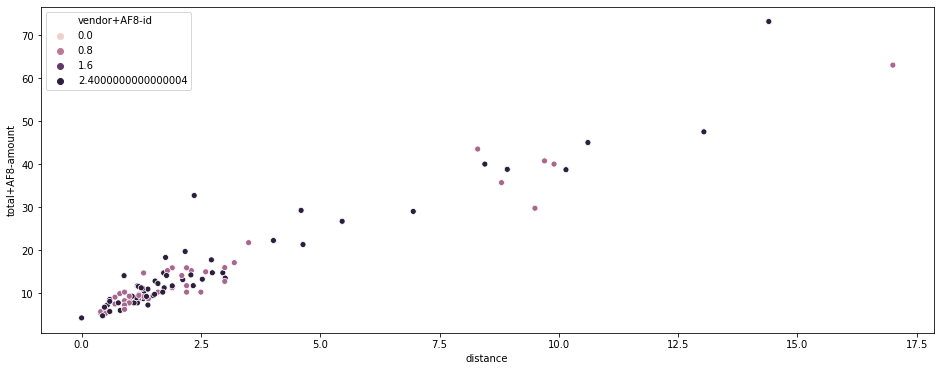

In [155]:
plt.figure(figsize=(16,6))
sns.scatterplot(x=X_final['distance'].iloc[0:100],y=y_final.iloc[0:100],hue=df['vendor+AF8-id'])

# the plot above shows that,the vendor with ID =2 tends to charge more than the vendor with ID =1 as the distance increases.

In [86]:
X=np.array(X_final)
Y=np.array(y_final)

In [179]:
scaler.fit(X)
scaled_train=scaler.transform(X)

In [180]:
print(scaled_train[3])

[-0.47116207 -0.16172892 -0.0323037  -0.70576616]


In [181]:
x_train,x_val,y_train,y_val=train_test_split(scaled_train,Y,test_size=0.1,random_state=1)
print(x_train[1657][3])

-0.7057661585421416


In [182]:
y_val=y_val.reshape(-1,1)
print(y_val)

[[11.8]
 [12.96]
 [9.8]
 ...
 [8.8]
 [6.3]
 [7.8]]


In [183]:
print(y_train[1657])

11.16


In [184]:
model=RandomForestRegressor(n_estimators=10,random_state=1)

In [185]:
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [186]:
pred=model.predict(x_val)

In [187]:
pred=pred.reshape(-1,1)
print(pred)

[[13.57272794]
 [12.99986659]
 [10.97593652]
 ...
 [ 9.18495333]
 [ 5.5169565 ]
 [ 7.12135725]]


In [188]:
print(y_val)

[[11.8]
 [12.96]
 [9.8]
 ...
 [8.8]
 [6.3]
 [7.8]]


In [189]:
a=[]
for i in range(len(pred)):
    if(pred[i]>=y_val[i]):
        a.append(pred[i]-y_val[i])
    else:
        a.append(y_val[i]-pred[i])

In [190]:
pred[i]-y_val[i]
len(a)

104858

In [191]:
s=0
for i in range(len(a)):
    s=s+a[i] 

In [192]:
print(s)

[247061.90132720504]


In [193]:
len(y_val)

104858

In [194]:
print(s/len(y_val))

[2.3561569105571825]


# mean_absolute_error(for the model) ~ 2.36036

In [195]:
from sklearn.metrics import mean_squared_error

In [196]:
error=mean_squared_error(pred,y_val)

In [197]:
print(error)

28.113020635874804


In [198]:
print(error**0.5)

5.302171313327664


# working on our test data. 

In [199]:
df1=pd.read_csv('C:/Users/Dr697699/Downloads/test.csv',low_memory=False)

In [200]:
features=['num_passengers','toll_amount','distance','extra_charges']
df1.columns

Index(['ID', 'vendor_id', 'pickup_loc', 'drop_loc', 'driver_tip', 'mta_tax',
       'distance', 'pickup_time', 'drop_time', 'num_passengers', 'toll_amount',
       'payment_method', 'rate_code', 'stored_flag', 'extra_charges',
       'improvement_charge'],
      dtype='object')

In [201]:
x_test=df1[features]
x_tf=np.array(x_test)
print(x_test.iloc[25])

num_passengers    1.0
toll_amount       0.0
distance          0.7
extra_charges     1.0
Name: 25, dtype: float64


In [202]:
scaler=StandardScaler()
scaler.fit(x_tf)
scaled_f=scaler.transform(x_tf)

In [203]:
model=RandomForestRegressor(n_estimators=10,random_state=1)

In [217]:
model.fit(X,Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [218]:
pred=model.predict(x_tf)

In [219]:
output = pd.DataFrame({'ID': df1.ID,'total_amount':pred})
output.to_csv('C:/Users/Dr697699/Downloads/sampleSubmission.csv', index=False)

In [213]:
model1=LinearRegression(fit_intercept=True,n_jobs=8)

In [214]:
model1.fit(scaled_train,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=8, normalize=False)

In [215]:
prediction=model1.predict(scaled_f)

In [216]:
output = pd.DataFrame({'ID': df1.ID,'total_amount':prediction})
output.to_csv('C:/Users/Dr697699/Downloads/sampleSubmission.csv', index=False)